Mohamad Nafis (Blitar)
> Dataset : "weatherinfoweek" \
> Sumber : Kaggle \
> Link Dataset : https://www.kaggle.com/code/davidbnn92/weather-data

In [148]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional,Dropout

In [149]:
import pandas as pd

dt = pd.read_csv('weatherinfoweek.csv')
dt

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0.0,0.0,22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,NaN,Afghanistan,33.0000,65.0000,2020-01-23,0.0,0.0,23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,NaN,Afghanistan,33.0000,65.0000,2020-01-24,0.0,0.0,24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,NaN,Afghanistan,33.0000,65.0000,2020-01-25,0.0,0.0,25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,NaN,Afghanistan,33.0000,65.0000,2020-01-26,0.0,0.0,26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17887,26378,NaN,Zambia,-15.4167,28.2833,2020-03-20,2.0,0.0,80,70.6,62.6,81.9,999.9,NaN,62.8,0.761545,0.198068,6.0,0.00,0
17888,26379,NaN,Zambia,-15.4167,28.2833,2020-03-21,2.0,0.0,81,71.3,66.2,81.5,999.9,NaN,65.3,0.812047,0.212487,7.1,99.99,1
17889,26380,NaN,Zambia,-15.4167,28.2833,2020-03-22,3.0,0.0,82,72.1,67.1,80.4,999.9,NaN,66.7,0.829815,0.218712,5.0,99.99,1
17890,26381,NaN,Zambia,-15.4167,28.2833,2020-03-23,3.0,0.0,83,71.7,66.2,80.6,999.9,NaN,62.8,0.733343,0.192580,4.2,0.00,0


In [150]:
dt.drop(['Id','Province/State','ConfirmedCases', 'Fatalities', 'day_from_jan_first'], axis=1, inplace=True)
dt.head()

,Country/Region,Lat,Long,Date,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,Afghanistan,33.0,65.0,2020-01-22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,Afghanistan,33.0,65.0,2020-01-23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,Afghanistan,33.0,65.0,2020-01-24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,Afghanistan,33.0,65.0,2020-01-25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,Afghanistan,33.0,65.0,2020-01-26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1


In [151]:
dt.isnull().sum()

Country/Region       0
Lat                  0
Long                 0
Date                 0
temp                 0
min                137
max                 16
stp                  0
slp               6947
dewp               618
rh                 618
ah                 618
wdsp                 0
prcp                 0
fog                  0
dtype: int64

In [152]:
dt.dropna(subset=['min'],inplace=True)
dt.dropna(subset=['max'],inplace=True)
dt.dropna(subset=['slp'],inplace=True)
dt.dropna(subset=['dewp'],inplace=True)
dt.dropna(subset=['rh'],inplace=True)
dt.dropna(subset=['ah'],inplace=True)
dt.isnull().sum()

Country/Region    0
Lat               0
Long              0
Date              0
temp              0
min               0
max               0
stp               0
slp               0
dewp              0
rh                0
ah                0
wdsp              0
prcp              0
fog               0
dtype: int64

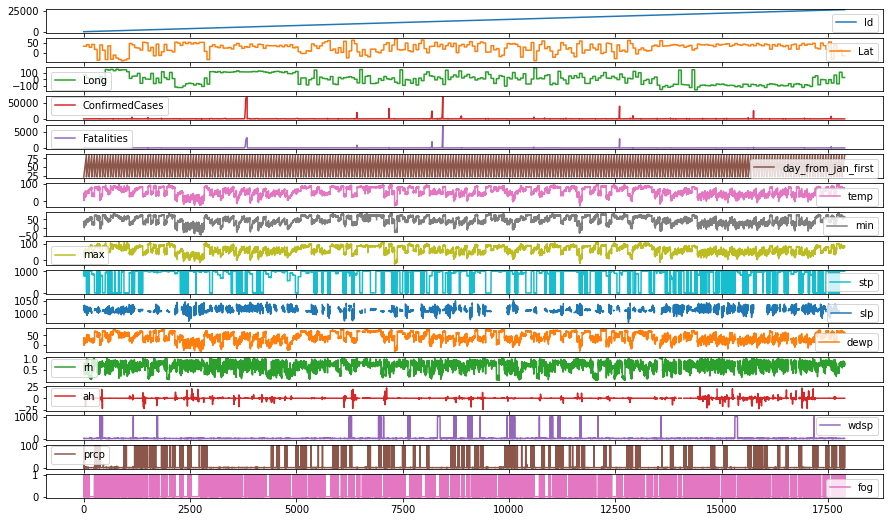

In [153]:
df_plot = df
df_plot[df_plot.columns.to_list()].plot(subplots=True, figsize=(15, 9))
plt.show()

In [154]:
dates = dt['Date'].values
temp = dt['temp'].values

dates = np.array(dates)
temp = np.array(temp)

Text(0.5, 0, 'Datetime')

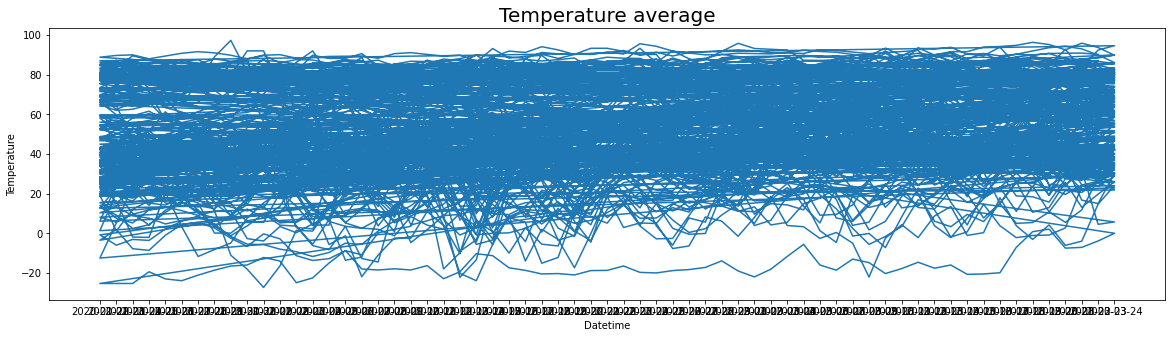

In [155]:
plt.figure(figsize=(20,5))
plt.plot(dates, temp)
plt.title('Temperature average',
          fontsize=20);
plt.ylabel('Temperature')
plt.xlabel('Datetime')

In [156]:
dt.dtypes

Country/Region     object
Lat               float64
Long              float64
Date               object
temp              float64
min               float64
max               float64
stp               float64
slp               float64
dewp              float64
rh                float64
ah                float64
wdsp              float64
prcp              float64
fog                 int64
dtype: object

In [157]:
x_train, x_valid, y_train, y_valid = train_test_split(temp, dates, train_size=0.8, test_size = 0.2, shuffle = False )

In [158]:
print('Total Data Latih : ',len(x_train))
print('Total Data Validation : ',len(x_valid))

Total Data Latih :  8452
Total Data Validation :  2113


In [159]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [160]:
tf.keras.backend.set_floatx('float64')

train_set = windowed_dataset(x_train, window_size=64, batch_size=200, shuffle_buffer=1000)
val_set = windowed_dataset(x_valid, window_size=64, batch_size=200, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [161]:
threshold_mae = (dt['temp'].max() - dt['temp'].min()) * 10/100

In [162]:
print(threshold_mae)

12.45


In [163]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<12.45 and logs.get('val_mae')<12.45):
      print("\nMAE model < 10% skala data")
      self.model.stop_training = True
callbacks = myCallback()

In [164]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [165]:
history = model.fit(train_set,epochs=100,validation_data = val_set,callbacks=[callbacks])

Epoch 1/100
42/42 [==============================] - 36s 753ms/step - loss: 55.4936 - mae: 55.9930 - val_loss: 43.5192 - val_mae: 44.0191
Epoch 2/100
42/42 [==============================] - 31s 733ms/step - loss: 54.9428 - mae: 55.4423 - val_loss: 43.0866 - val_mae: 43.5862
Epoch 3/100
42/42 [==============================] - 33s 774ms/step - loss: 54.4764 - mae: 54.9758 - val_loss: 42.5145 - val_mae: 43.0144
Epoch 4/100
42/42 [==============================] - 31s 734ms/step - loss: 53.8073 - mae: 54.3069 - val_loss: 41.6530 - val_mae: 42.1529
Epoch 5/100
42/42 [==============================] - 31s 736ms/step - loss: 52.7642 - mae: 53.2635 - val_loss: 40.2058 - val_mae: 40.7056
Epoch 6/100
42/42 [==============================] - 33s 775ms/step - loss: 50.8268 - mae: 51.3258 - val_loss: 37.4591 - val_mae: 37.9589
Epoch 7/100
42/42 [==============================] - 31s 735ms/step - loss: 46.9921 - mae: 47.4909 - val_loss: 31.6356 - val_mae: 32.1352
Epoch 8/100
42/42 [===============

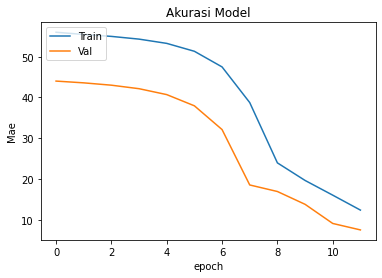

In [166]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Akurasi Model')
plt.ylabel('Mae')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

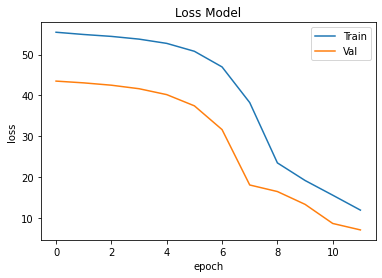

In [167]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()